In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Unzip

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-38.58353503070409 -7.995590270210556
-0.9226337499760007 25.990734666937044
65.65823984448895 -136.25283133710033
2.413970789268774 -36.50566819273692
33.10638212044974 -135.0041951439101
89.66992968375257 112.25211985853224
-85.16228633324239 125.2451430696824
21.48987271046495 141.78581050331695
-71.54157127096614 -3.3175810318320487
18.83665209862889 -119.48674664775163
23.057992961714362 123.6024203055054
-14.469870880016174 -156.0254922287157
-19.905344720933584 -106.77535454506166
-58.11557968543702 -50.659429832229705
68.31132110799578 -79.70055863461839
45.55612218110372 148.50902620324132
87.9013982015397 72.40442249013012
75.33397381080877 -59.40070733633988
30.520568700594495 60.01923205538526
50.71539916168473 -16.09901895779106
12.943582606990645 -101.78572627180093
-74.50021211352092 77.72262948705065
24.954865582547853 3.198371889623303
-60.272369645983915 -114.2968327565608
71.44675740665102 111.26202526564128
-80.85053481897889 126.7044538093142
-60.977504776677705 17

In [5]:
from citipy import citipy

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | kisangani
Processing Record 3 of Set 1 | mayo
Processing Record 4 of Set 1 | trairi
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | shimoda
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | ishigaki
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | zabol
Processing Record 20 of Set 1 | dingle
Processing Record 21 of Set 1 | acapulco
Processing Record 22 of Set 1 | busselton
Processing Rec

Processing Record 40 of Set 4 | siverek
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | artyk
City not found. Skipping...
Processing Record 43 of Set 4 | jizan
Processing Record 44 of Set 4 | grand-santi
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | luba
Processing Record 47 of Set 4 | ambo
Processing Record 48 of Set 4 | godda
Processing Record 49 of Set 4 | vagur
Processing Record 50 of Set 4 | ramhormoz
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | pangnirtung
Processing Record 4 of Set 5 | muroto
Processing Record 5 of Set 5 | mercedes
Processing Record 6 of Set 5 | carnarvon
Processing Record 7 of Set 5 | singaraja
Processing Record 8 of Set 5 | poum
Processing Record 9 of Set 5 | quime
Processing Record 10 of Set 5 | phangnga
Processing Record 11 of Set 5 | hokitika
Processing Record 12 of Set 5 | nadvoitsy
Processing Record 13 

Processing Record 29 of Set 8 | tabuk
Processing Record 30 of Set 8 | batticaloa
Processing Record 31 of Set 8 | meulaboh
Processing Record 32 of Set 8 | port hedland
Processing Record 33 of Set 8 | auki
Processing Record 34 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 35 of Set 8 | sabang
Processing Record 36 of Set 8 | cururupu
Processing Record 37 of Set 8 | nanortalik
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | san quintin
Processing Record 40 of Set 8 | challapata
Processing Record 41 of Set 8 | te anau
Processing Record 42 of Set 8 | barh
Processing Record 43 of Set 8 | cockburn town
Processing Record 44 of Set 8 | kommunisticheskiy
Processing Record 45 of Set 8 | garissa
Processing Record 46 of Set 8 | port hardy
Processing Record 47 of Set 8 | ternate
Processing Record 48 of Set 8 | gat
Processing Record 49 of Set 8 | daokou
Processing Record 50 of Set 8 | rio grande
Processing Record 1 of Set 9 | mangai
Processing Record 2 of 

Processing Record 14 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 15 of Set 12 | santa vitoria do palmar
Processing Record 16 of Set 12 | pasni
Processing Record 17 of Set 12 | selma
Processing Record 18 of Set 12 | cayenne
Processing Record 19 of Set 12 | tecoanapa
Processing Record 20 of Set 12 | marawi
Processing Record 21 of Set 12 | camacupa
Processing Record 22 of Set 12 | bac lieu
Processing Record 23 of Set 12 | lala
Processing Record 24 of Set 12 | keita
Processing Record 25 of Set 12 | mecca
Processing Record 26 of Set 12 | dir
Processing Record 27 of Set 12 | ambunti
Processing Record 28 of Set 12 | grand forks
Processing Record 29 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 30 of Set 12 | acari
Processing Record 31 of Set 12 | crib point
Processing Record 32 of Set 12 | giyani
Processing Record 33 of Set 12 | bucerias
Processing Record 34 of Set 12 | turukhansk
Processing Record 35 of Set 12 | suluq
Processing Record 36

In [11]:
len(city_data)

553

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,63.99,51,1,9.22,US,2021-09-29 21:49:18
1,Kisangani,0.5167,25.2000,70.68,98,100,4.61,CD,2021-09-29 21:49:26
2,Mayo,38.8876,-76.5119,73.08,56,1,1.01,US,2021-09-29 21:49:26
3,Trairi,-3.2778,-39.2689,79.34,83,8,10.27,BR,2021-09-29 21:46:03
4,Fortuna,40.5982,-124.1573,73.18,47,1,7.00,US,2021-09-29 21:46:46
5,Saskylakh,71.9167,114.0833,22.84,89,97,3.62,RU,2021-09-29 21:49:27
6,New Norfolk,-42.7826,147.0587,51.93,68,100,2.66,AU,2021-09-29 21:49:27
7,Shimoda,34.6667,138.9500,70.11,77,100,6.67,JP,2021-09-29 21:49:28
8,Hermanus,-34.4187,19.2345,55.80,78,95,22.50,ZA,2021-09-29 21:49:28
9,Constitucion,-35.3333,-72.4167,54.03,64,1,5.86,CL,2021-09-29 21:48:15


In [28]:
#reorder the columns

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-09-29 21:49:18,42.0970,-79.2353,63.99,51,1,9.22
1,Kisangani,CD,2021-09-29 21:49:26,0.5167,25.2000,70.68,98,100,4.61
2,Mayo,US,2021-09-29 21:49:26,38.8876,-76.5119,73.08,56,1,1.01
3,Trairi,BR,2021-09-29 21:46:03,-3.2778,-39.2689,79.34,83,8,10.27
4,Fortuna,US,2021-09-29 21:46:46,40.5982,-124.1573,73.18,47,1,7.00
...,...,...,...,...,...,...,...,...,...
548,Sakakah,SA,2021-09-29 21:53:12,29.9697,40.2064,80.17,23,0,8.70
549,Ushibuka,JP,2021-09-29 21:53:12,32.1906,130.0228,74.95,80,2,5.79
550,Vilhena,BR,2021-09-29 21:51:33,-12.7406,-60.1458,77.97,59,73,1.50
551,Bantry,IE,2021-09-29 21:53:13,51.6833,-9.4500,56.68,87,100,17.94


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

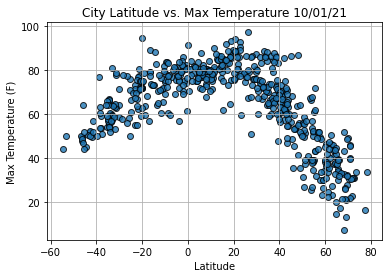

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

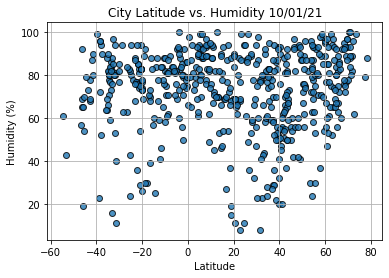

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

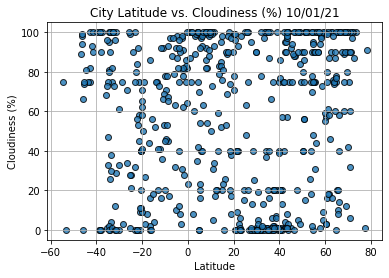

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

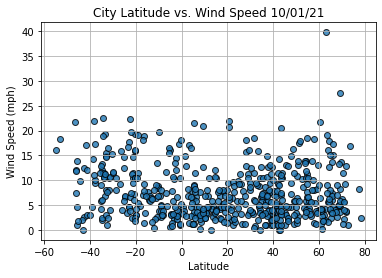

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-09-29 21:46:34
Lat                         -54.8
Lng                         -68.3
Max Temp                    44.26
Humidity                       61
Cloudiness                     75
Wind Speed                  16.11
Name: 13, dtype: object

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-09-29 21:49:18,42.0970,-79.2353,63.99,51,1,9.22
1,Kisangani,CD,2021-09-29 21:49:26,0.5167,25.2000,70.68,98,100,4.61
2,Mayo,US,2021-09-29 21:49:26,38.8876,-76.5119,73.08,56,1,1.01
4,Fortuna,US,2021-09-29 21:46:46,40.5982,-124.1573,73.18,47,1,7.00
5,Saskylakh,RU,2021-09-29 21:49:27,71.9167,114.0833,22.84,89,97,3.62


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

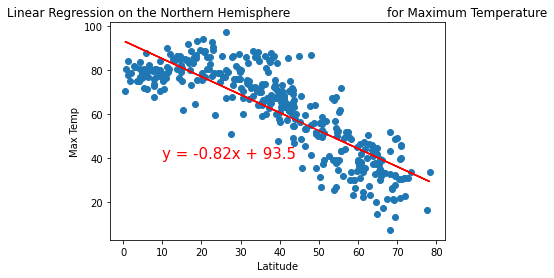

The r-value is: -0.838


In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

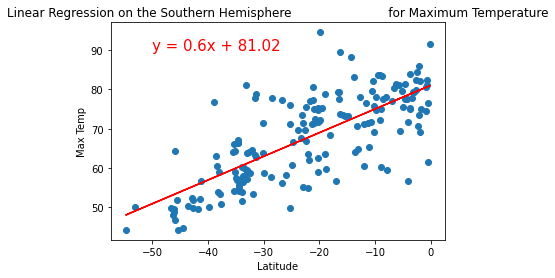

The r-value is: 0.744


In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

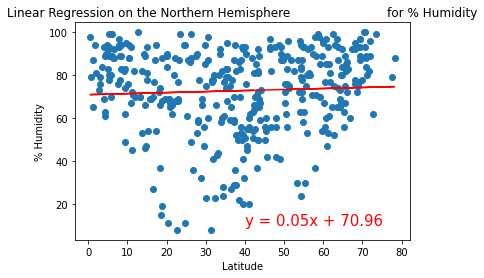

The r-value is: 0.050


In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

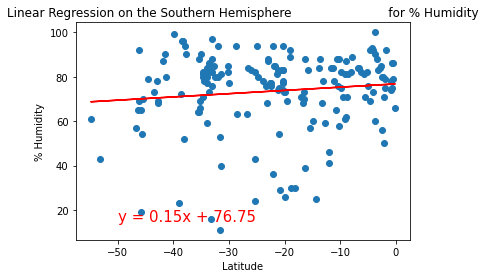

The r-value is: 0.115


In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

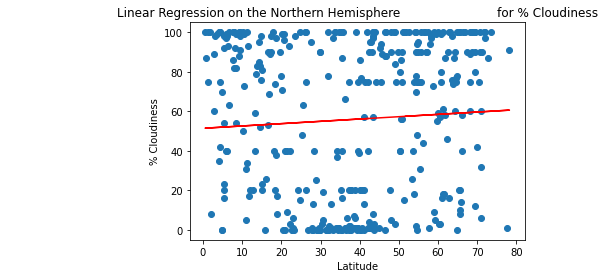

The r-value is: 0.061


In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

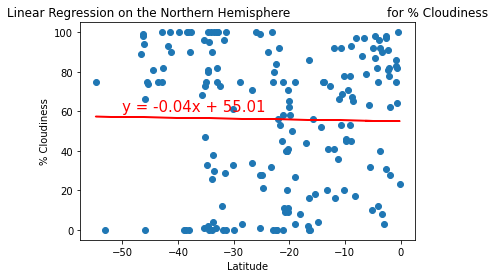

The r-value is: -0.017


In [52]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

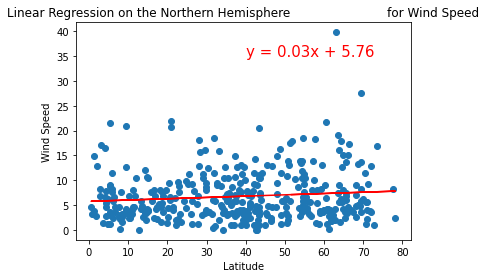

The r-value is: 0.107


In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = thern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")